In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
import statsmodels.api as sm
pd.options.mode.chained_assignment = None 

In [2]:
Dataset = 'carpetas_completa_julio_2021.csv'
Data = pd.read_csv(Dataset, sep=',', index_col=False, low_memory=False)

In [3]:
Data.head()

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
0,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,NaN,-99.140215,19.380315,NaN
1,2016.0,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,GRANJEROS,LOS CIPRESES,IZTAPALAPA,NaN,-99.108403,19.352859,NaN
2,2016.0,Febrero,2016-02-01 00:30:00,2016,Febrero,2016-02-01 01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",57,UI-3CD,DELITO DE BAJO IMPACTO,BATALLONES ROJOS,NaN,UNIDAD VICENTE GUERRERO,IZTAPALAPA,NaN,-99.061321,19.356451,NaN
3,2016.0,Enero,2016-01-31 22:00:00,2016,Febrero,2016-02-01 02:09:11,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-3CD,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,GERANIO,GAVILLEROS,EMILIANO ZAPATA,IZTAPALAPA,NaN,-98.976379,19.331633,NaN
4,2015.0,Diciembre,2015-12-25 12:00:00,2016,Febrero,2016-02-01 02:16:49,DENUNCIA DE HECHOS,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-3SD,HECHO NO DELICTIVO,SAN FRANCISCO,AVENIDA COLONIA DEL VALLE,DEL VALLE CENTRO,BENITO JUAREZ,NaN,-99.172189,19.387114,NaN


# Pregunta 2:
Identifica delitos a la alza y a la baja en CDMX (cuidado con los delitos con poca ocurrencia)

Procedimiento: Se obtiene un subset de datos con "delitos" y "fecha_mes". Se suman los delitos por mes para ver cuales son los más prediminantes. Se seleccionan los primeros 15 delitos.

Procedimiento: Se obtiene un subset de datos con "delitos" y "fecha_mes". Se suman los delitos por mes para ver cuales son los más prediminantes. Se seleccionan los primeros 15 delitos.

In [6]:
# Se agrega columan con la fecha completa
Data['fecha_mes']=pd.to_datetime(Data['fecha_hechos']).dt.date

# Subset de datos con delitos y fecha
Q2_subset=Data[['delito', 'fecha_mes']]

# Fecha de analysis
inicio_analisis= datetime.datetime(2013,1,1)
fin_analisis   = datetime.datetime(2022,1,1)

Q2_subset=Q2_subset[(inicio_analisis<=pd.to_datetime(Q2_subset['fecha_mes'])) & (pd.to_datetime(Q2_subset['fecha_mes'])<=fin_analisis)]

# Ordenamiento por fecha
Q2_subset = Q2_subset.sort_values(by="fecha_mes")

# Se cuentan los delitos por reporte
Q2b_subset = Q2_subset['delito'].value_counts()

# Lista con los delitos con mayores denuncias
lista_delitos=Q2b_subset.index.values


In [7]:
# Delitos con mayor reporte (fecha) de mayor a menor
Q2b_subset

VIOLENCIA FAMILIAR                                                        131672
FRAUDE                                                                     77118
ROBO DE OBJETOS                                                            73757
AMENAZAS                                                                   68747
ROBO A NEGOCIO SIN VIOLENCIA                                               66991
                                                                           ...  
HOMICIDIO INTENCIONAL Y ROBO DE VEHICULO                                       1
SECUESTRO                                                                      1
PROCREACION ASISTIDA, INSEMINACION ARTIFICIAL Y ESTERILIZACION FORZADA         1
ROBO A TRANSEUNTE EN VIA PUBLICA (NOMINA) SIN VIOLENCIA                        1
UTILIZACION INDEBIDA DE LA VIA PUBLICA                                         1
Name: delito, Length: 345, dtype: int64

In [8]:
#Lista de todos los delitos denunciados. Los primeros en la lista son los más recurrentes
lista_delitos

array(['VIOLENCIA FAMILIAR', 'FRAUDE', 'ROBO DE OBJETOS', 'AMENAZAS',
       'ROBO A NEGOCIO SIN VIOLENCIA',
       'ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA',
       'ROBO DE ACCESORIOS DE AUTO', 'DENUNCIA DE HECHOS',
       'ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO',
       'ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA',
       'ROBO A CASA HABITACION SIN VIOLENCIA', 'ABUSO DE CONFIANZA',
       'DESPOJO', 'NARCOMENUDEO POSESION SIMPLE',
       'DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A AUTOMOVIL',
       'FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMENTOS DE CREDITO PUBLICO',
       'ROBO A NEGOCIO CON VIOLENCIA', 'ABUSO SEXUAL',
       'USURPACIÓN DE IDENTIDAD', 'LESIONES INTENCIONALES POR GOLPES',
       'LESIONES CULPOSAS POR TRANSITO VEHICULAR EN COLISION',
       'ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VIOLENCIA',
       'ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA',
       'DAÑO EN PROPIEDAD AJENA INTENCIONAL',
       'ROBO DE VEHICULO DE SE

In [9]:
# numero de delitos a analizar
num_del=15

In [11]:
# Análisis del delito con mayores reportes: Violencia Familiar

### Instrucción que toma el delito con más denuncias de la lista de delitos (1ro en la lista)
# H1 subset con delitos únicos 
H1=Q2_subset.loc[Q2_subset['delito'] == lista_delitos[0]]

# Se elimiminan los "días" de la fecha para "SUMAR" los delitos "POR MES"
H1.loc[:,['num_crimen']] = H1['fecha_mes'].apply(lambda x: x.strftime('%Y-%m'))

H1

,delito,fecha_mes,num_crimen
72568,VIOLENCIA FAMILIAR,2013-01-01,2013-01
127412,VIOLENCIA FAMILIAR,2013-01-01,2013-01
839808,VIOLENCIA FAMILIAR,2013-01-01,2013-01
494570,VIOLENCIA FAMILIAR,2013-01-01,2013-01
17001,VIOLENCIA FAMILIAR,2013-01-01,2013-01
...,...,...,...
1268497,VIOLENCIA FAMILIAR,2021-07-31,2021-07
1268357,VIOLENCIA FAMILIAR,2021-07-31,2021-07
1268386,VIOLENCIA FAMILIAR,2021-07-31,2021-07
1268392,VIOLENCIA FAMILIAR,2021-07-31,2021-07


In [12]:
# Análisis individual del delito más reportado en CDMX entre 2013 y 2020: Violencia familia. En aumento

f1=H1.num_crimen.value_counts().sort_index().to_frame()

f1['fecha_mes']=f1.index

f1=f1.set_index(pd.to_datetime(pd.to_datetime(f1.index, format='%Y-%m') ) )

#f1=f1.set_index(pd.to_datetime(f1.index))

f1['month']=pd.to_datetime(f1.index)

f1=f1.set_index('month')

f1.drop('fecha_mes', axis=1, inplace=True)
f1

,num_crimen
month,
2013-01-01,7
2013-02-01,2
2013-03-01,5
2013-04-01,1
2013-05-01,3
...,...
2021-03-01,3196
2021-04-01,3077
2021-05-01,3085


In [23]:
%matplotlib inline 

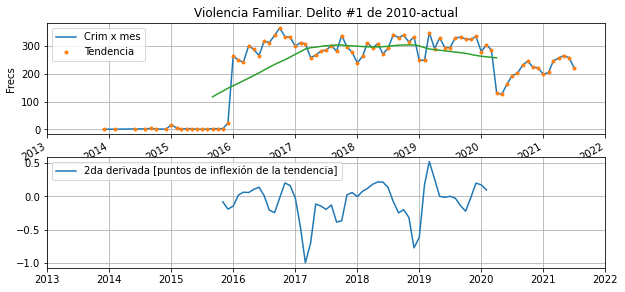

In [24]:
# Gráfica del delito con más reportes:  Violencia familiar

plt.rcParams['figure.figsize'] = [10, 5]
fig, ax = plt.subplots(nrows=2, ncols=1)

f1.plot(kind='line', title='Violencia Familiar. Delito #1 de 2010-actual', xlabel='Año', ylabel='Frec ', legend='crim x mes', grid=True, ax=ax[0])
f1.plot(style="o", ms=3, ax=ax[0])
# para obetener tendiencia y peridiocidad
decomposition=sm.tsa.seasonal_decompose(f1, model='additive', period=30)
decomposition.trend.plot(kind='line', title='', xlabel='Año', ylabel='Frecs ',grid=True, ax=ax[0])


ax[0].legend(['Crim x mes','Tendencia'])
    
# Segunda derivada para calcular puntos de inflexión y separar tendencias bimodales
second_derv = np.gradient(np.gradient(decomposition.trend))
 
    
ax[1].plot(decomposition.trend.index, second_derv / np.nanmax(np.abs(second_derv)))
ax[1].legend(['2da derivada [puntos de inflexión de la tendencia]'])
ax[1].grid(True)

ax[0].set_xlim(inicio_analisis,fin_analisis)
ax[1].set_xlim(inicio_analisis,fin_analisis)
plt.savefig('Violecia_familiar.png',dpi=300, bbox_inches='tight')

In [25]:
#Número de delitos a analizar
num_delitos=15

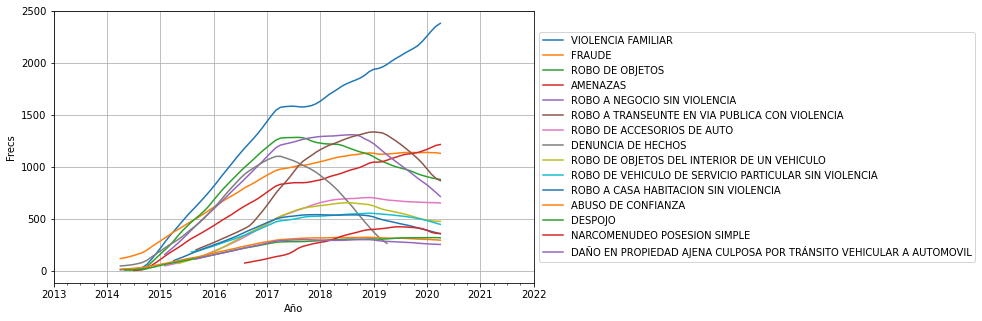

In [32]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [10, 5]

for i in range(num_delitos):

    # H1 subset con delitos únicos 
    H1=Q2_subset.loc[Q2_subset['delito'] == lista_delitos[i]]
    

    # Se elimiminan los "días" de la fecha para "SUMAR" los delitos "POR MES"
    H1.loc[:,['num_crimen']] = H1['fecha_mes'].apply(lambda x: x.strftime('%Y-%m'))


    f1=H1.num_crimen.value_counts().sort_index().to_frame()
    f1['fecha_mes']=f1.index
    f1=f1.set_index(pd.to_datetime(pd.to_datetime(f1.index, format='%Y-%m') ) )

    f1=f1.set_index(pd.to_datetime(f1.index))
    f1['month']=pd.to_datetime(f1.index)
    f1=f1.set_index('month')
    f1.drop('fecha_mes', axis=1, inplace=True)
    

    # para obetener tendiencia y peridiocidad
    decomposition=sm.tsa.seasonal_decompose(f1, model='additive', period=30)
    decomposition.trend.plot(kind='line', title='', xlabel='Año', ylabel='Frecs ',grid=True, ax=ax)

    ax.legend(['Crim x mes','Tendencia'])
    
    ax.set_xlim(inicio_analisis,fin_analisis)

    # Reducción del 80% de la gráfica
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.99, box.height])

    #Legenda a la derecha de la gráfica
    ax.legend(lista_delitos[0:19],loc='center left', bbox_to_anchor=(1, 0.5))
    
    #plt.savefig('Tendencia15Delitos.png',dpi=300, bbox_inches='tight')

# Respuesta a pregunta 2:
Pregunta: Identifica delitos a la alza y a la baja en CDMX (cuidado con los delitos con poca ocurrencia)

Respuesta: Las tendencias a la alta o baja se determinaron a partir del punto de inflexión. Nota: No se debe hizo el análisis de tendencias con todo el set de datos, ya que el incremento de denuncias se da a partir del 2105, posiblemente debido a la recopilacción intensiva de datos.

delitos en alta:
    
    Violencia familiar
    Amenazas


Delitos a la baja:

    Fraude
    Robo de accesorios de automóviles
    Despojo
    Robo de objetos
    Robo a negocios S/V
    Robo a transeúntes
    Denuncia de hechos
    Robo de objetos del interesado
    Robo de Vehículos de servicios
    Robo a casa habitación
    Abuso de confianza
    Despojo
    Narcomenudeo Posesión
    Daño en propiedad Ajena

# Pregunta 3: 

¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos?             
¿Por qué crees que sea esto?

# Respuesta a pregunta 3. :
    ¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos?  
    Alcaldía con mayores delitos:        Cuauhtemoc
    Alcaldía con menores delitos:        Milpa Alta

In [33]:
# Crímenes por alcaldía a partir del 2013
Q3=Data[(Data['fecha_mes']>datetime.date(2013,1,1)) ] 
Count=Q3['alcaldia_hechos'].value_counts()

Count.head(16)

CUAUHTEMOC                195464
IZTAPALAPA                189847
GUSTAVO A MADERO          126714
BENITO JUAREZ             104172
ALVARO OBREGON             85887
COYOACAN                   84462
MIGUEL HIDALGO             81945
TLALPAN                    74059
VENUSTIANO CARRANZA        72607
AZCAPOTZALCO               61317
IZTACALCO                  52498
XOCHIMILCO                 39756
TLAHUAC                    31242
LA MAGDALENA CONTRERAS     20749
CUAJIMALPA DE MORELOS      18730
MILPA ALTA                  9119
Name: alcaldia_hechos, dtype: int64

# Pregunta 4:
1. ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la semana, quincenas) en la CDMX? 
2. ¿A qué crees que se deba?

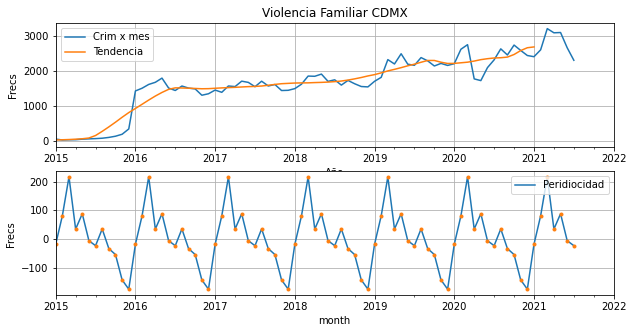

In [37]:
### Instrucción que toma el delito con más denuncias de la lista de delitos

# H1 subset con delitos únicos 
H1=Q2_subset.loc[Q2_subset['delito'] == lista_delitos[0]]

# Se elimiminan los "días" de la fecha para "SUMAR" los delitos "POR MES"
H1.loc[:,['num_crimen']] = H1['fecha_mes'].apply(lambda x: x.strftime('%Y-%m'))

# Análisis individual del delito más reportado en CDMX entre 2013 y 2020: Violencia familia. En aumento

f1=H1.num_crimen.value_counts().sort_index().to_frame()
f1['fecha_mes']=f1.index
f1=f1.set_index(pd.to_datetime(pd.to_datetime(f1.index, format='%Y-%m') ) )

f1=f1.set_index(pd.to_datetime(f1.index))
f1['month']=pd.to_datetime(f1.index)
f1=f1.set_index('month')
f1.drop('fecha_mes', axis=1, inplace=True)


# Gráfica del delito con más reportes:  Violencia familiar
# Fecha de analysis
inicio_analisis_1= datetime.datetime(2015,1,1)
fin_analisis_1   = datetime.datetime(2022,1,1)

plt.rcParams['figure.figsize'] = [10, 5]
fig, ax = plt.subplots(nrows=2, ncols=1)

f1.plot(kind='line', title='Violencia Familiar CDMX', xlabel='Año', ylabel='Frec ', legend='crim x mes', grid=True, ax=ax[0])

# Tendiencia y peridiocidad
decomposition=sm.tsa.seasonal_decompose(f1, model='additive', period=12)
decomposition.trend.plot(kind='line', title='', xlabel='Año', ylabel='Frecs ',grid=True, ax=ax[0])

ax[0].legend(['Crim x mes','Tendencia'])
    
# Peridiocidad
decomposition.seasonal.plot(kind='line', title='', xlabel='Año', ylabel='Frecs ',grid=True, ax=ax[1])
decomposition.seasonal.plot(style="o", ms=3, ax=ax[1])


ax[1].legend(['Peridiocidad'])
ax[1].grid(True)

ax[0].set_xlim(inicio_analisis_1,fin_analisis_1)
ax[1].set_xlim(inicio_analisis_1,fin_analisis_1)

plt.savefig('Violecia_familiar_peridiocidad.png',dpi=300, bbox_inches='tight')

In [38]:
Q2_subset

,delito,fecha_mes
1204043,ABUSO SEXUAL,2013-01-01
674060,TENTATIVA DE EXTORSION,2013-01-01
819821,ROBO DE OBJETOS,2013-01-01
1126979,VIOLACION EQUIPARADA,2013-01-01
1062702,FRAUDE,2013-01-01
...,...,...
1268426,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,2021-07-31
1268428,VIOLENCIA FAMILIAR,2021-07-31
1268429,AMENAZAS,2021-07-31
1268396,FRAUDE,2021-07-31


,num_crimen
month,
2013-01-01,7
2013-02-01,2
2013-03-01,5
2013-04-01,1
2013-05-01,3
...,...
2021-03-01,3196
2021-04-01,3077
2021-05-01,3085


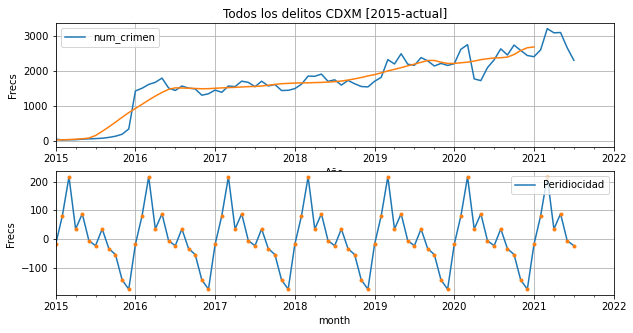

In [40]:
plt.rcParams['figure.figsize'] = [10, 5]
fig, ax = plt.subplots(nrows=2, ncols=1)

# Periodo de analysis
inicio_analisis_2= datetime.datetime(2015,1,1)
fin_analisis_2   = datetime.datetime(2022,1,1)

Q2_subsett = Q2_subset

f11=H1.num_crimen.value_counts().sort_index().to_frame()
f11['fecha_mes']=f11.index

f11=f11.set_index(pd.to_datetime(pd.to_datetime(f11.index, format='%Y-%m') ) )

f11=f11.set_index(pd.to_datetime(f11.index))
f11['month']=pd.to_datetime(f11.index)
f11=f11.set_index('month')
f11.drop('fecha_mes', axis=1, inplace=True)

f11.plot(kind='line', title='Todos los delitos CDXM [2015-actual]', xlabel='Año', ylabel='Frec ', legend='crim x mes', grid=True, ax=ax[0])


decomposition_full=sm.tsa.seasonal_decompose(f11, model='additive', period=12)
decomposition_full.trend.plot(kind='line', title='Todos los delitos CDXM [2015-actual]', xlabel='Año', ylabel='Frecs ',grid=True, ax=ax[0])

# Peridiocidad
decomposition.seasonal.plot(kind='line', title='', xlabel='Año', ylabel='Frecs ',grid=True, ax=ax[1])
decomposition.seasonal.plot(style="o", ms=3, ax=ax[1])


ax[1].legend(['Peridiocidad'])
ax[1].grid(True)

ax[0].set_xlim(inicio_analisis_2,fin_analisis_2)
ax[1].set_xlim(inicio_analisis_2,fin_analisis_2)
plt.savefig('TodosDelitos_Tendencia_peridiocidad.png',dpi=300, bbox_inches='tight')

f11

# Respuesta a preguntas 4:
Preguntas:
    1. ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la semana, quincenas) en la CDMX? 
    2. ¿A qué crees que se deba?

Respuestas:
    1. Los datos se analizaron por mes. Los delitos tienen a disminuir a finales de año. En enero los delitos suben.
    2. Por Factor económico. En la cuesta de enero suben los delitos.

# Preguntas 5:
¿Cuáles son los delitos que más caracterizan a cada alcaldía? Es decir, delitos que
suceden con mayor frecuencia en una alcaldía y con menor frecuencia en las demás.


In [41]:
Alcaldias_list = Count.head(16).index.values
Alcaldias_list

array(['CUAUHTEMOC', 'IZTAPALAPA', 'GUSTAVO A MADERO', 'BENITO JUAREZ',
       'ALVARO OBREGON', 'COYOACAN', 'MIGUEL HIDALGO', 'TLALPAN',
       'VENUSTIANO CARRANZA', 'AZCAPOTZALCO', 'IZTACALCO', 'XOCHIMILCO',
       'TLAHUAC', 'LA MAGDALENA CONTRERAS', 'CUAJIMALPA DE MORELOS',
       'MILPA ALTA'], dtype=object)

# Top 5 delitos por alcaldia CDMX

In [42]:
subset_alcandia = Data[['delito', 'fecha_mes', 'calle_hechos', 'calle_hechos2', 'colonia_hechos', 'alcaldia_hechos', 'longitud', 'latitud']]
# Para guardar los 5 delitos co mayor ocurrencia por alcaldía
df_alcaldias       = pd.DataFrame(data = np.zeros([5,16]), columns = Alcaldias_list)

# Para indicador de seguridad por calles: 5 calles con más delitos
df_alcaldias_iseg1  = pd.DataFrame(data = np.zeros([5,16]), columns = Alcaldias_list)
df_alcaldias_iseg2  = pd.DataFrame(data = np.zeros([5,16]), columns = Alcaldias_list)

#for i in range(len(Alcaldias_list)):
for i in range(16):
    # 5 delitos con más reporte por alcaldía
    Alc_1=subset_alcandia.loc[subset_alcandia['alcaldia_hechos'] == Alcaldias_list[i]]
    Alc_1['delito'].value_counts(ascending=False)[:5]

    df_alcaldias.loc[:,[Alcaldias_list[i]]] = Alc_1['delito'].value_counts(ascending=False)[:5].index.values
    
    # 5 calles más peligrosas por alcaldía
    
    Alc_2=subset_alcandia.loc[subset_alcandia['alcaldia_hechos'] == Alcaldias_list[i]]
    Alc_2.drop( Alc_2[ Alc_2['calle_hechos'] == '-NO ESPECIFICAN LUGAR EXACTO DE LOS HECHOS' ].index , inplace=True)
    Alc_2.drop( Alc_2[ Alc_2['calle_hechos'] == '.NO PROPORCIONA CALLE DE HECHOS' ].index , inplace=True)
    Alc_2.drop( Alc_2[ Alc_2['calle_hechos'] == '#¿NOMBRE?' ].index , inplace=True)
    Alc_2.drop( Alc_2[ Alc_2['calle_hechos'] == '#¨NOMBRE?' ].index , inplace=True)
    Alc_2.drop( Alc_2[ Alc_2['calle_hechos'] == '.SIN PRECISAR' ].index , inplace=True)
    Alc_2.drop( Alc_2[ Alc_2['calle_hechos'] == '-NO ESPECIFICAN LUGAR DE HECHOS' ].index , inplace=True)
    Alc_2.drop( Alc_2[ Alc_2['calle_hechos'] == '(NO SE PRECISA LA CALLE)' ].index , inplace=True)
    Alc_2.drop( Alc_2[ Alc_2['calle_hechos'] == '-SE IGNORA EL LUGAR EXACTO DEL ROBO-' ].index , inplace=True)
    Alc_2.drop( Alc_2[ Alc_2['calle_hechos'] == '-SE IGNORA EL LUGAR EXACTO DEL ROBO' ].index , inplace=True)
    Alc_2.drop( Alc_2[ Alc_2['calle_hechos'] == '-(NOTIFICACION DE HOSPITAL)-' ].index , inplace=True)
    Alc_2.drop( Alc_2[ Alc_2['calle_hechos'] == '-NO PRECISA LUIGAR DE HECHOS-' ].index , inplace=True)
    Alc_2.drop( Alc_2[ Alc_2['calle_hechos'] == '-SE IGNORA EL LUGAR EXACTO DE LOS HECHOS' ].index , inplace=True)
    Alc_2.drop( Alc_2[ Alc_2['calle_hechos'] == '.' ].index , inplace=True)
    Alc_2.drop( Alc_2[ Alc_2['calle_hechos'] == '..' ].index , inplace=True)
    Alc_2.drop( Alc_2[ Alc_2['calle_hechos'] == '-NO ESPECIFICAN LUGAR DEL ROBO' ].index , inplace=True)
    Alc_2.drop( Alc_2[ Alc_2['calle_hechos'] == '-NO ESPECIFICAN LUGAR EXACTO DEL ROBO' ].index , inplace=True)
    Alc_2.drop( Alc_2[ Alc_2['calle_hechos'] == 'NO SE UBICA CALLE NI COLONIA' ].index , inplace=True)
    Alc_2.drop( Alc_2[ Alc_2['calle_hechos'] == '-NO ESPECIFICA EL LUGAR DE HECHOS' ].index , inplace=True)
    Alc_2.drop( Alc_2[ Alc_2['calle_hechos'] == 'NO SE TIENEN MAS DATOS' ].index , inplace=True)
    Alc_2.drop( Alc_2[ Alc_2['calle_hechos'] == 'NO PROPORCIONA CALLE' ].index , inplace=True)
     
    Alc_2.drop( Alc_2[ Alc_2['calle_hechos'] == '-NO PRECISA LUGAR DE LOS HECHOS-' ].index , inplace=True)
    Alc_2.drop( Alc_2[ Alc_2['calle_hechos'] == '-NO SE UBICO NEGOCIO' ].index , inplace=True)
    Alc_2.drop( Alc_2[ Alc_2['calle_hechos'] == '1' ].index , inplace=True)
    Alc_2.drop( Alc_2[ Alc_2['calle_hechos'] == '(NO SE ENCONTRO CALLE)' ].index , inplace=True)
    Alc_2.drop( Alc_2[ Alc_2['calle_hechos'] == '(NO SE ESPECIFICA CALLE)' ].index , inplace=True)
    Alc_2.drop( Alc_2[ Alc_2['calle_hechos'] == '(NO SE UBICA CALLE)' ].index , inplace=True)
    Alc_2.drop( Alc_2[ Alc_2['calle_hechos'] == '-NO INDICAN CALLE' ].index , inplace=True)
    Alc_2.drop( Alc_2[ Alc_2['calle_hechos'] == '     ' ].index , inplace=True)
    Alc_2.drop( Alc_2[ Alc_2['calle_hechos'] == 'NO REFIERE CALLE' ].index , inplace=True)
    
    dff=Alc_2.groupby(['calle_hechos', 'calle_hechos2']).size()[:5]
    Alc_2['calle_hechos'].value_counts(ascending=False)[:5]
    df_alcaldias_iseg1.loc[:,[Alcaldias_list[i]]] = Alc_2['calle_hechos'].value_counts(ascending=False)[:5].index.values
    df_alcaldias_iseg2.loc[:,[Alcaldias_list[i]]] = dff.index.values

df_alcaldias

,CUAUHTEMOC,IZTAPALAPA,GUSTAVO A MADERO,BENITO JUAREZ,ALVARO OBREGON,COYOACAN,MIGUEL HIDALGO,TLALPAN,VENUSTIANO CARRANZA,AZCAPOTZALCO,IZTACALCO,XOCHIMILCO,TLAHUAC,LA MAGDALENA CONTRERAS,CUAJIMALPA DE MORELOS,MILPA ALTA
0,FRAUDE,VIOLENCIA FAMILIAR,VIOLENCIA FAMILIAR,FRAUDE,VIOLENCIA FAMILIAR,VIOLENCIA FAMILIAR,FRAUDE,VIOLENCIA FAMILIAR,VIOLENCIA FAMILIAR,VIOLENCIA FAMILIAR,VIOLENCIA FAMILIAR,VIOLENCIA FAMILIAR,VIOLENCIA FAMILIAR,VIOLENCIA FAMILIAR,VIOLENCIA FAMILIAR,VIOLENCIA FAMILIAR
1,ROBO DE OBJETOS,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A NEGOCIO SIN VIOLENCIA,ROBO DE ACCESORIOS DE AUTO,AMENAZAS,ROBO DE OBJETOS,ROBO DE OBJETOS,AMENAZAS,ROBO DE OBJETOS,ROBO A NEGOCIO SIN VIOLENCIA,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,AMENAZAS,AMENAZAS,AMENAZAS,FRAUDE,AMENAZAS
2,ROBO A NEGOCIO SIN VIOLENCIA,AMENAZAS,AMENAZAS,ROBO A NEGOCIO SIN VIOLENCIA,FRAUDE,ROBO A NEGOCIO SIN VIOLENCIA,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO DE OBJETOS,AMENAZAS,AMENAZAS,AMENAZAS,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,FRAUDE,ROBO A NEGOCIO SIN VIOLENCIA,ROBO A CASA HABITACION SIN VIOLENCIA
3,VIOLENCIA FAMILIAR,ROBO A NEGOCIO SIN VIOLENCIA,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO DE OBJETOS,ROBO DE OBJETOS,FRAUDE,ROBO A NEGOCIO SIN VIOLENCIA,FRAUDE,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO DE OBJETOS,ROBO DE OBJETOS,ROBO DE OBJETOS,ROBO DE OBJETOS,ROBO DE OBJETOS,ROBO DE OBJETOS,ROBO DE OBJETOS
4,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO DE OBJETOS,ROBO DE OBJETOS,VIOLENCIA FAMILIAR,ROBO A NEGOCIO SIN VIOLENCIA,AMENAZAS,VIOLENCIA FAMILIAR,ROBO A NEGOCIO SIN VIOLENCIA,DENUNCIA DE HECHOS,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,FRAUDE,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,FRAUDE,ROBO A CASA HABITACION SIN VIOLENCIA,AMENAZAS,DESPOJO


# Respuesta a preguntas 5:

Preguntas:
¿Cuáles son los delitos que más caracterizan a cada alcaldía? Es decir, delitos que
suceden con mayor frecuencia en una alcaldía y con menor frecuencia en las demás.

Respuestas:
El delito "Violencia Familiar" se ubica a la cabeza de la mayoría de las alcaldías, a excepción de la Cuahtemoc(3er lugar), Benito Juarez(5to lugar) y Miguel Hidalgo (5to lugar).

Delitos predominantes por alcadía, exceptuando "Violencia Familiar":

CUAUHTEMOC       = FRAUDE

IZTAPALAPA       = ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA

GUSTAVO A MADERO = ROBO A NEGOCIO SIN VIOLENCIA

BENITO JUAREZ    = ROBO DE ACCESORIOS DE AUTO

ALVARO OBREGON   = AMENAZAS
COYOACAN         = ROBO A NEGOCIO SIN VIOLENCIA

MIGUEL HIDALGO   = ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA

TLALPAN          = ROBO DE OBJETOS

VENUSTIANO CARRANZA = DENUNCIA DE HECHOS

AZCAPOTZALCO     = ROBO A NEGOCIO SIN VIOLENCIA

IZTACALCO        = FRAUDE

XOCHIMILCO       = ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI.

TLAHUAC          = ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA

LA MAGDALENA CONTRERAS = ROBO A CASA HABITACION SIN VIOLENCIA

CUAJIMALPA DE MORELOS  = ROBO A NEGOCIO SIN VIOLENCIA

MILPA ALTA       = DESPOJO

# Preguntas 6:
Diseña un indicador que mida el nivel de “inseguridad”. Genéralo al nivel de
desagregación que te parezca más adecuado (ej. manzana, calle, AGEB, etc.). Analiza los
resultados ¿Encontraste algún patrón interesante? ¿Qué decisiones se podrían tomar
con el indicador?

# Res resouesta a preguntas 6:
1. Se creó  un indicador Diseña un indicador que mida el nivel de “inseguridad”. Genéralo al nivel de
desagregación que te parezca más adecuado (ej. manzana, calle, AGEB, etc.). Analiza los
resultados ¿Encontraste algún patrón interesante? ¿Qué decisiones se podrían tomar
con el indicador?

# Tabla con los 5 calles más peligrosas por alcaldía

In [44]:
#df_alcaldias_iseg1.to_excel("Alcaldias_5CallesPeligrosas.xlsx")  
df_alcaldias_iseg1

,CUAUHTEMOC,IZTAPALAPA,GUSTAVO A MADERO,BENITO JUAREZ,ALVARO OBREGON,COYOACAN,MIGUEL HIDALGO,TLALPAN,VENUSTIANO CARRANZA,AZCAPOTZALCO,IZTACALCO,XOCHIMILCO,TLAHUAC,LA MAGDALENA CONTRERAS,CUAJIMALPA DE MORELOS,MILPA ALTA
0,EJE CENTRAL LAZARO CARDENAS,AVENIDA TLAHUAC,CALZADA DE GUADALUPE,CALZADA DE TLALPAN,AVENIDA REVOLUCION,CALZADA DE TLALPAN,CALZADA MEXICO TACUBA,CALZADA DE TLALPAN,FRAY SERVANDO TERESA DE MIER,AVENIDA CUITLAHUAC,CALZADA IGNACIO ZARAGOZA,CUAUHTEMOC,AVENIDA TLAHUAC,AVENIDA SAN JERONIMO,JOSE MARIA CASTORENA,NIÑOS HEROES
1,AV. JUAREZ,CALZADA ERMITA IZTAPALAPA,EJE CENTRAL LAZARO CARDENAS,AVENIDA UNIVERSIDAD,AVENIDA CENTENARIO,MIGUEL ANGEL DE QUEVEDO,BOULEVARD MANUEL AVILA CAMACHO,CARRETERA PICACHO AJUSCO,CALZADA IGNACIO ZARAGOZA,CALZADA VALLEJO,PLUTARCO ELIAS CALLES,PROLONGACION DIVISION DEL NORTE,AV. TLAHUAC,AV. SAN JERONIMO,VASCO DE QUIROGA,BOULEVARD NUEVO LEON
2,PASEO DE LA REFORMA,CALZADA IGNACIO ZARAGOZA,JAIME NUNO,AV. UNIVERSIDAD,VASCO DE QUIROGA,PERIFERICO SUR,AV. EJERCITO NACIONAL,PERIFERICO SUR,CECILIO ROBELO,RABAUL,RIO CHURUBUSCO,16 DE SEPTIEMBRE,AVENIDA LA TURBA,ALVARO OBREGON,CARRETERA MEXICO TOLUCA,MORELOS
3,NIÑOS HEROES,ERMITA IZTAPALAPA,CALZ. DE GUADALUPE,AV. INSURGENTES SUR,AVENIDA SAN JERONIMO,CANAL DE MIRAMONTES,MARINA NACIONAL,CALZADA ACOXPA,CALZ. IGNACIO ZARAGOZA,NORTE 45,AVENIDA RIO CHURUBUSCO,CIRCUITO MARTINEZ DE CASTRO,SAN RAFAEL ATLIXCO,EMILIANO ZAPATA,AVENIDA VASCO DE QUIROGA,EMILIANO ZAPATA
4,AVENIDA JUAREZ,AV. TLAHUAC,CALZADA SAN JUAN DE ARAGON,INSURGENTES SUR,AV. CENTENARIO,CALZADA DEL HUESO,LAGO ALBERTO,CALZADA DEL HUESO,CONGRESO DE LA UNION,AVENIDA AQUILES SERDAN,CALZADA DE LA VIGA,GLADIOLAS,GITANA,AVENIDA MEXICO,PASEO DE LOS TAMARINDOS,FABIAN FLORES


# Tabla con las 5 intersecciones más peligrosas por alcaldía

In [45]:
#df_alcaldias_iseg2.to_excel("Alcaldias_5InterseccionesPeligrosas.xlsx")  
df_alcaldias_iseg2

,CUAUHTEMOC,IZTAPALAPA,GUSTAVO A MADERO,BENITO JUAREZ,ALVARO OBREGON,COYOACAN,MIGUEL HIDALGO,TLALPAN,VENUSTIANO CARRANZA,AZCAPOTZALCO,IZTACALCO,XOCHIMILCO,TLAHUAC,LA MAGDALENA CONTRERAS,CUAJIMALPA DE MORELOS,MILPA ALTA
0,((BAJAR DEL VAGON EN LA ESTACION METRO HIDALGO...,"(""EL HOYO"", NO PROPORCIONA LUGAR DE LOS HECHOS)","((BODEGA AURRERA), AV. VICTORIA)","((CTO. INTERIOR AV. RÍO CHURUBUSCO), UNIVERSID...","((CARRETERA TOLUCA MEXICO KILOMETRO 15), (LA C...","(""A"", MANZANA VII, AVENIDA TAXQUEÑA)","((METRO TACUBAYA), AV JALISCO)",((INTERIOR DE LA UNIDAD HAB. EMILIO PORTES GIL...,"((CERCA HOSPITAL MATERNO INFANTIL INGUARÁN), C...","((METRO) ROSARIO, CULTURA NORTE)","((EJE 4 OTE) CANAL RÌO CHURUBUSCO, CANAL DE RI...",((AREA NATURAL PROTEGIDA EJIDOS DE XOCHIMILCO ...,"(05 DE MAYO, AMADOR SALAZAR)","(02 DE ABRIL, 02 DE ABRIL)","(-SE IGNORA EL LUGAR EXACTO DE LOS HECHOS-, -S...","(05 DE MAYO, SIN SEGUNDA CALLE)"
1,"((EJE 1 PTE.) AV. CUAUHTÉMOC, (EJE 3 SUR) DR. ...","((ACUERDO A/10/2002), (ACUERDO A/10/2002))","((CERRO EL MIRADOR), (CERRO EL MIRADOR))","((DOMICILIO DE LA VICTIMA), (DOMICILIO DE LA V...","((NO PROPORCIONA CALLE), (NO PROPORCIONA CALLE))","(""N"", TEXMELUCAN)","((METRO) PANTEONES, DIRECCIÓN A TACUBAYA)","((NO SE TIENEN MAS DATOS), .)","((ESTACION JAMAICA) AV MORELOS, DIRECCION PANT...",((SAN PEDRITO NO SE ENCUENTRA LA CALLE) CAMPO ...,"((METRO) PANTITLAN, AV. RIO CHURUBUSCO)","((INTEROR DEL CENTRO VARONIL RECLUSORIO SUR), ...","(10 DE ABRIL, HORTENSIA)","(1 A CDA DE SAN JERONIMO, NOGAL D ELA INDIA)","(06 DE ENERO, POSADAS)","(1 CERRADA DE SOR JUANA INES DE LA CRUZ, QUINT..."
2,"((EJE 1) LÓPEZ RAYÓN, PASEO DE LA REFORMA Y IG...","((METRO) ATLALILCO, CALZ. ERMITA IZTAPALAPA)","((EL CHARCO) (DATOS SIAP), PEPE GUIZAR)","((SALIENDO DEL METRO PARQUE DE LOS VENADOS), C...","((NO REFIERE CALLE), .)","(""R"", CALZADA DE LAS BOMBAS)","((METRO) POLANCO, AV. HORACIO)","(, EN SAN JUAN DE DIOS, ESQUINA ACOXPA)","((ESTACION OCEANIA)AVENIDA RIO CONSULADO, DIRE...","(, 22 DE FEBRERO, Y CASTILLA ORIENTE)","(1 DE MAYO, PRIMERO DE MAYO)",(-HECHOS OCURRIDOS EN EL PERIMETRO DE LA COLON...,"(10 DE ABRIL, JACARANDAS)","(1 CDA DE PRESILLA, LUIS CABRERA)","(1 DE ABRIL, CARR. DESIERTO DE LOS LEONES)","(15 DE SEPTIEMBRE, ANGEL ZIMBRON)"
3,"((EJE 2 NTE.) AV. PROF. EULALIA GUZMÁN, OYAMEL...","((METRO) CONSTITUCION DE 1917, CALZADA ERMITA ...",((EL LUGAR DE LOS HECHOS ES ACUEDUCTO DE GUADA...,"(,DIAGONAL SAN ANTONIO, SUCURSAL BANCARIA DE B...",((POR UNA BARRANCA QUE SE UBICA POR LA DELEGAC...,"((EJE 10 SUR) AVENIDA COPILCO, FACULTADES)","(.NOTIFICACION DEL HOSPITAL RUBEN LEÑERO, .)","(-NO ESPECIFICAN CALLE DE HECHOS, SOLO COLONIA...",((METRO) BOULEVARD PUERTO AEREO CALZ. IGNACIO ...,"(. LAS CULTURAS, ALBAÑILES)","(1 DE MAYO, 16 DE SEPTIEMBRE)","(-HOSPITAL MATERNO PEDIATRIO DE XOCHIMILCO-, (...","(10 SUR, AUTOPISTA MEXICO PUEBLA)","(1 SE SUBESTACION, (LA COL. SUB-ESTACION NO ES...","(1 DE ABRIL, SANTA ANA)","(15 DE SEPTIEMBRE, AV. FABIAN FLORES OTE)"
4,"((ESTACION) SAN COSME, DIRECCION CUATRO CAMINOS)","((METRO) CONSTITUCION DE 1917, ERMITA IZTAPALAPA)","((METRO) INDIOS VERDES, AVENIDA INSURGENTES N...","(-NO ESPECIFICA EL LUGAR DE HECHOS, -NO ESPEC...","(,PROLONGACION AV.5 DE MAYO (HOSPITAL ENRIQUE ...","((NO SE UBICA CALLE NI COLONIA), TAXQUEÑA)","(08 DE SEPTIEMBRE COLONIA DANIEL GARZA, MIGUE...","(/NO SE UBICA CALLE), PROLONGACION DE CANAL DE...","((METRO) CIUDAD DEPORTIVA, VIAD. RÍO DE LA PIE...","(05 DE FBRERO, SANTA CRUZ ACAYUCAN)","(1 DE MAYO, VIADUCTO)","(02 DE ABRIL, 20 DE NOVIEMBRE)","(10 SUR (CARRETERA A SANTA CATARINA), VALLE AL...","(10 DE ABRIL (NO ESTA MARCADA), ESQUINA GUAMUC...","(1 RA CDA DE LOS CEDROS, ENTRE CARRETERA MÉXIC...","(15 DE SEPTIEMBRE, CAMINO REAL ANGEL SIMBRON)"
